# Trabalho Prático 1 - Análise de Dados em Informática (Poluição Ambiental na Europa)

## 4.1 - Análise e Exploração de Dados

1. Construa um gráfico que permita visualizar os níveis médios do poluente __O3__ nas diversas regiões de
Portugal __(NUTS Code)__. Indique a região com nível médio de __O3__ mais elevado.

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
df_europe = pd.read_csv("AIRPOL_data.csv", sep=";")

# Convert all columns to numeric values
numeric_columns = ['Air_Pollution_Average[ug/m3]', 'Value', 'Populated_Area[km2]', 'Affected_Population']
for col in numeric_columns:
    if col in df_europe.columns:
        df_europe[col] = df_europe[col].astype(str).str.replace(",", ".").astype(float)


C:\Users\slvad\AppData\Local\Temp\ipykernel_31164\1988574286.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_portugal_o3["NUTS_Code"] = df_portugal_o3["NUTS_Code"].astype(str)


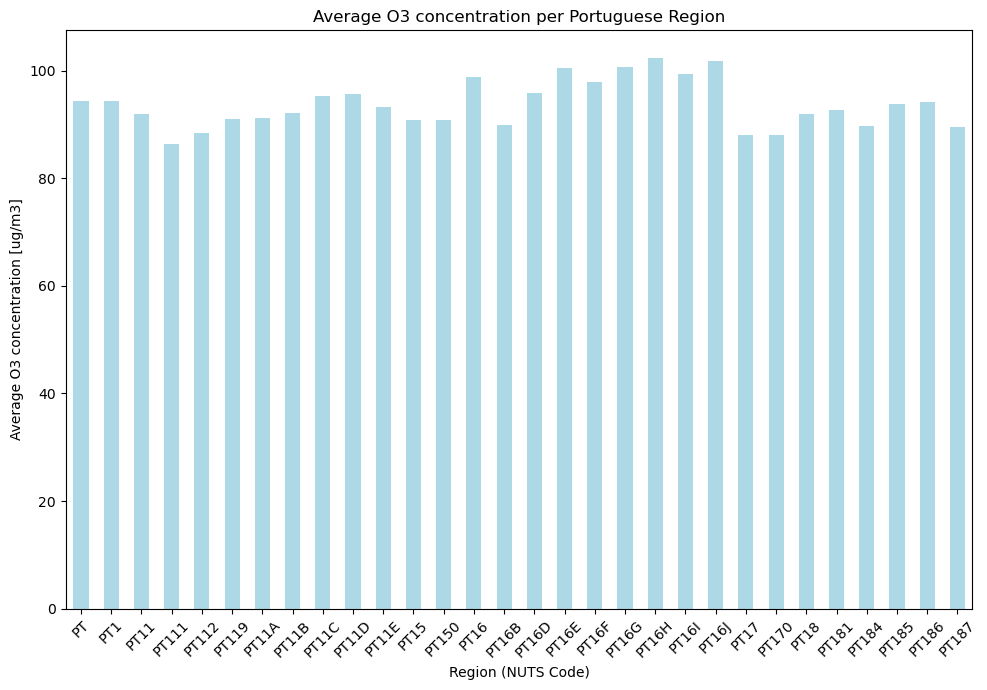

In [18]:
# Extract Portugal O3 data if there is any
df_portugal_o3 = df_europe[(df_europe["Country"] == "Portugal") & (df_europe["Air_Pollutant"] == "O3")]
if df_portugal_o3.empty:
    print("No O3 data for Portugal")
    exit()

# Calculate average O3 concentration per Portuguese Region (NUTS_Code)
df_portugal_o3["NUTS_Code"] = df_portugal_o3["NUTS_Code"].astype(str)
avg_o3_per_region = df_portugal_o3.groupby("NUTS_Code")["Air_Pollution_Average[ug/m3]"].mean()

# Plot
plt.figure(figsize=(10, 7))
avg_o3_per_region.plot(kind="bar", color="lightblue")
plt.title("Average O3 concentration per Portuguese Region")
plt.xlabel("Region (NUTS Code)")
plt.ylabel("Average O3 concentration [ug/m3]")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [19]:
# Region with highest O3 concentration
max_o3 = avg_o3_per_region.idxmax()
max_o3_value = avg_o3_per_region.max()
print(f"Region with highest O3 concentration: {max_o3} with {max_o3_value:.2f} ug/m3")

Region with highest O3 concentration: PT16H with 102.40 ug/m3


2. Usando boxplots, construa um gráfico que permita comparar as distribuições dos níveis médios do poluente __PM2.5__ em Portugal, Espanha, Franca e Itália.

C:\Users\slvad\AppData\Local\Temp\ipykernel_31164\1614277780.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Country", y="Air_Pollution_Average[ug/m3]", data=df_countries_pm25, palette="Set3")


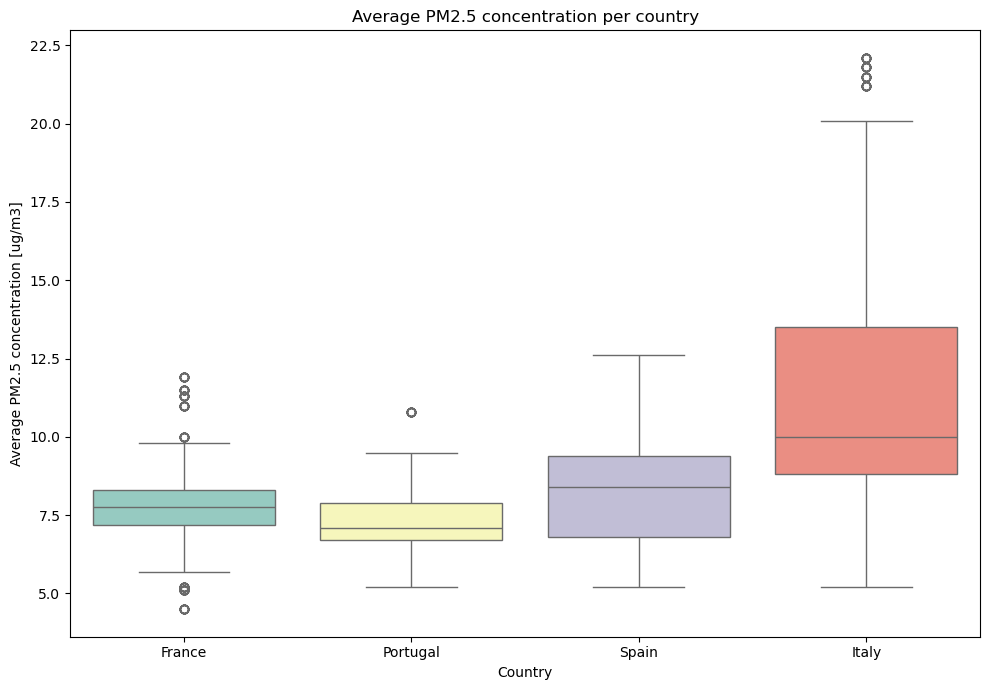

In [20]:
import seaborn as sns

# Extract countries and PM2.5 data
countries = ["Portugal", "Spain", "France", "Italy"]
df_countries_pm25 = df_europe[(df_europe["Country"].isin(countries)) & (df_europe["Air_Pollutant"] == "PM2.5")]

# Boxplot
plt.figure(figsize=(10, 7))
sns.boxplot(x="Country", y="Air_Pollution_Average[ug/m3]", data=df_countries_pm25, palette="Set3")
plt.title("Average PM2.5 concentration per country")
plt.xlabel("Country")
plt.ylabel("Average PM2.5 concentration [ug/m3]")
plt.tight_layout()
plt.show()

3. Usando uma representação gráfica adequada, compare as distribuições do número de mortes prematuras (__Value__) em Portugal, Espanha, França e Itália.

C:\Users\slvad\AppData\Local\Temp\ipykernel_31164\3633808342.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_countries_death, x="Country", y="Value", palette="Set3")


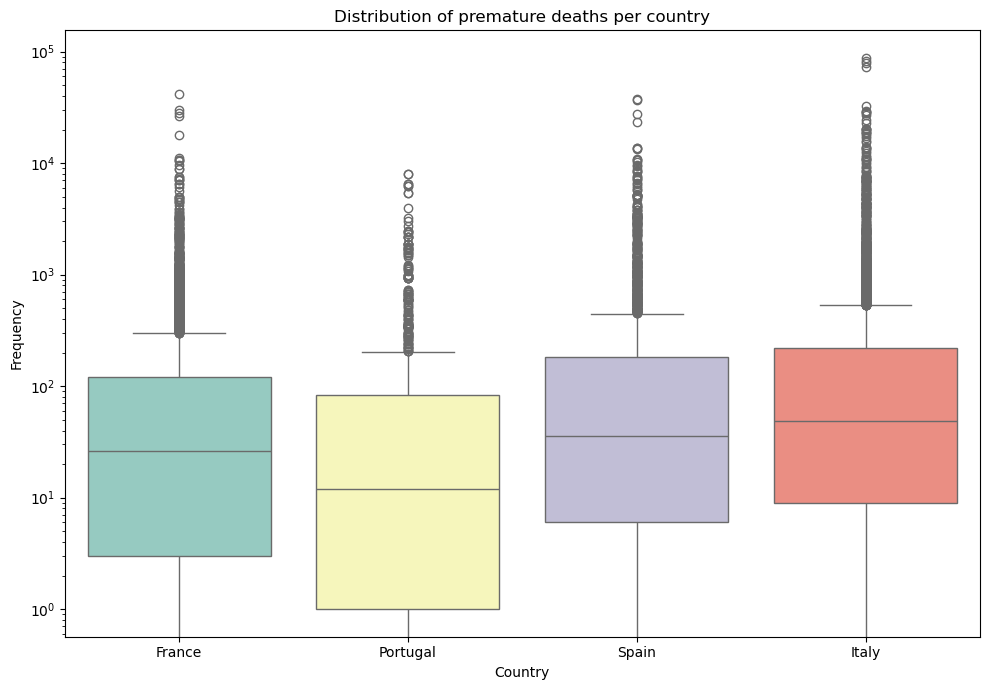

In [21]:
# Extract premature death data from the countries
df_countries_death = df_europe[df_europe["Country"].isin(countries)]

# Distribution plot
plt.figure(figsize=(10, 7))
sns.boxplot(data=df_countries_death, x="Country", y="Value", palette="Set3")
plt.title("Distribution of premature deaths per country")
plt.xlabel("Country")
plt.ylabel("Frequency")
plt.yscale("log")
plt.tight_layout()
plt.show()

4. Construa uma tabela que indique, os valores da média, quartis, desvio padrão, assimetria e curtose, do número de mortes prematuras (__Value__) associado a __STROKE__ para cada um dos países: Espanha, França, Itália e Grécia (apresente os resultados com 4 casas decimais) 

In [22]:
from scipy.stats import skew, kurtosis
from tabulate import tabulate

# Define countries
countries = ["Spain", "France", "Italy", "Greece"]

# Extract data associated with strokes for the specified countries
df_countries_stroke = df_europe[(df_europe["Country"].isin(countries)) & (df_europe["Outcome"] == "Stroke")]

# Function to calculate the statistics
def calculate_stats(group):
    return pd.Series({
        "Mean": group.mean(),
        "Q1": group.quantile(0.25),
        "Median": group.median(),
        "Q3": group.quantile(0.75),
        "Standard Deviation": group.std(),
        "Skewness": group.skew(),
        "Kurtosis": group.kurtosis()
    })

# Group by country and apply the function
df_stats = df_countries_stroke.groupby("Country")["Value"].apply(calculate_stats).round(4)

print(tabulate(df_stats.unstack().T, headers="keys", tablefmt="pretty", showindex=True))

+--------------------+-----------+----------+-----------+-----------+
|                    |  France   |  Greece  |   Italy   |   Spain   |
+--------------------+-----------+----------+-----------+-----------+
|        Mean        | 259.1919  | 334.1071 | 668.8781  | 440.9848  |
|         Q1         |    6.0    |   7.0    |   21.0    |   13.0    |
|       Median       |   36.5    |   39.5   |   78.0    |   56.5    |
|         Q3         |   150.0   |  188.5   |  295.25   |  248.75   |
| Standard Deviation | 1207.8623 | 1321.048 | 3425.7706 | 1654.5759 |
|      Skewness      |  16.8939  | 10.4851  |  16.3037  |  11.1839  |
|      Kurtosis      | 364.0919  | 142.0496 |  341.054  | 166.7873  |
+--------------------+-----------+----------+-----------+-----------+


## 4.2 - Inferência Estatística

1. Considere na base de dados os valores relativos a Portugal e selecione aleatoriamente uma amostra
aleatória de 50 registos dos níveis médios de poluição atmosférica (__AirpolPT__).

In [23]:
import numpy as np

# Extract 50 random records for Portugal if available
df_portugal = df_europe[df_europe["Country"] == "Portugal"]
if len(df_portugal) < 50:
    print(f"Only {{len(df_portugal)}} out of 50 records needed for Portugal")
    exit()

# Sample 50 records
np.random.seed(42)
airpol_pt = df_portugal["Air_Pollution_Average[ug/m3]"].sample(50, random_state=42)

print(airpol_pt.describe().round(4).to_string())

count    50.0000
mean     10.0440
std      17.0073
min       3.4000
25%       5.9000
50%       6.9000
75%       7.3000
max      94.3000


2. Use esta amostra para testar se o número médio dos níveis de poluição atmosférica em Portugal é inferior ao número homólogo na Albânia.

In [24]:
import scipy.stats as stats

# Print hypothesis
print("H0: The average air pollution in Portugal is equal or greater than in Albania")
print("H1: The average air pollution in Portugal is less than in Albania")

# Extract Albania data
df_alb = df_europe[df_europe["Country"] == "Albania"]
airpol_alb = df_alb["Air_Pollution_Average[ug/m3]"].reset_index(drop=True)

mean_alb = airpol_alb.mean()
mean_pt = airpol_pt.mean()
std_pt = airpol_pt.std()
n_pt = len(airpol_pt)

# Calculate the t-test
t_stat = (mean_pt - mean_alb) / (std_pt /np.sqrt(n_pt))
p_value = stats.t.cdf(t_stat, n_pt-1)

# Print results
print(f"Portugal mean: {mean_pt:.4f}")
print(f"Albania mean: {mean_alb:.4f}")
print(f"t-statistic: {t_stat:.4f}")
print(f"p-value: {p_value:.4f}")

if p_value < 0.05:
    print("There's enough evidence to reject the null hypothesis")
    print("The average air pollution in Portugal is less than in Albania")
    print("With a 95% confidence level")
else:
    print("There's not enough evidence to reject the null hypothesis")
    print("With a 95% confidence level")

H0: The average air pollution in Portugal is equal or greater than in Albania
H1: The average air pollution in Portugal is less than in Albania
Portugal mean: 10.0440
Albania mean: 15.5189
t-statistic: -2.2763
p-value: 0.0136
There's enough evidence to reject the null hypothesis
The average air pollution in Portugal is less than in Albania
With a 95% confidence level


3. Selecione aleatoriamente duas amostras de 20 registos dos níveis médios de poluição atmosférica em Espanha e Franca. Use estas amostras para testar se os níveis de poluição atmosférica apresentam diferenças significativas entre os dois países.

In [25]:
# Print Hypothesis
print("H0: There's no significant difference between the levels of air pollution between Spain and France")
print("H1: There's a significant difference between the levels of air pollution between Spain and France")

# Extract Spain and France data
df_spain = df_europe[df_europe["Country"] == "Spain"]
df_france = df_europe[df_europe["Country"] == "France"]

# Check if there's enough data and extract it
if (len(df_spain) < 20) or (len(df_france) < 20):
    print("Not enough data for Spain and/or France")
    print(f"Spain: {len(df_spain)}, France: {len(df_france)}")
    exit()
else:
    n_samples = 20

# Sample 20 records from each country
airpol_spain = df_spain["Air_Pollution_Average[ug/m3]"].sample(n=n_samples, random_state=42).reset_index(drop=True)
airpol_france = df_france["Air_Pollution_Average[ug/m3]"].sample(n=n_samples, random_state=42).reset_index(drop=True)

# Check equal variance using Levene's test
_, p_levene = stats.levene(airpol_spain, airpol_france)
if p_levene < 0.05:
    equal_var = False
else:
    equal_var = True

# Perform t-test
t_stat, p_value = stats.ttest_ind(airpol_spain, airpol_france, equal_var=equal_var)

# Print results
print(f"Spain mean: {airpol_spain.mean():.4f}")
print(f"France mean: {airpol_france.mean():.4f}")
print(f"Levene's test p-value: {p_levene:.4f}")
print(f"t-statistic: {t_stat:.4f}")
print(f"p-value: {p_value:.4f}")

if p_value < 0.05:
    print("There's enough evidence to reject the null hypothesis")
    print("There's a significant difference between the levels of air pollution between Spain and France")
    print("With a 95% confidence level")
else:
    print("There's not enough evidence to reject the null hypothesis")
    print("With a 95% confidence level")

H0: There's no significant difference between the levels of air pollution between Spain and France
H1: There's a significant difference between the levels of air pollution between Spain and France
Spain mean: 25.0400
France mean: 11.1300
Levene's test p-value: 0.1439
t-statistic: 1.4953
p-value: 0.1431
There's not enough evidence to reject the null hypothesis
With a 95% confidence level


4. De modo semelhante considere quatro amostras aleatórias de 20 registos dos níveis médios de poluição atmosférica nos seguintes países: Portugal, Albânia, Espanha e França. Use estas amostras para testar a existência de diferenças significativas nos níveis médios de poluição atmosférica dos 4 países.
__Nota:__ Caso necessário efetue uma análise __post-hoc__ adequada. 

In [26]:
import statsmodels.api as sttmod
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Check if there's enough data for the four countries
countries = ["Portugal", "Albania", "Spain", "France"]
n_maximum_per_country = {country: len(df_europe[df_europe["Country"] == country]) for country in countries}
n_minimum = min(n_maximum_per_country.values())

if n_minimum < 20:
    print("Not enough data for one or more countries")
    print(n_maximum_per_country)
    exit()

# Sample 20 records from each country
airpol_samples = {}
for country in countries:
    airpol_samples[country] = df_europe[df_europe["Country"] == country]["Air_Pollution_Average[ug/m3]"].sample(n=20, random_state=42).reset_index(drop=True)

# Perform ANOVA test
anova_data = []
for country, sample in airpol_samples.items():
    for value in sample:
        anova_data.append({"Country": country, "Air_Pollution_Average": value})

anova_df = pd.DataFrame(anova_data)

model = sttmod.formula.ols("Air_Pollution_Average ~ C(Country)", data=anova_df).fit()
anova_results = sttmod.stats.anova_lm(model, typ=2)

print("ANOVA results:")
print(anova_results.round(4).to_string())

if anova_results.iloc[0]["PR(>F)"] < 0.05:
    print("There's enough evidence to reject the null hypothesis")
    print("There's a significant difference between the levels of air pollution between the four countries")
    print("With a 95% confidence level")

    # Post-hoc test
    tukey = pairwise_tukeyhsd(anova_df["Air_Pollution_Average"], anova_df["Country"], alpha=0.05)
    print("\nPost-hoc test results:")
    print(tukey.summary().round(4).as_text())

else:
    print("There's not enough evidence to reject the null hypothesis")
    print("With a 95% confidence level")

ANOVA results:
                sum_sq    df       F  PR(>F)
C(Country)   2048.6055   3.0  0.8588  0.4663
Residual    60431.0620  76.0     NaN     NaN
There's not enough evidence to reject the null hypothesis
With a 95% confidence level


# 4.3 - Correlação e Regressão

1. Considere os dados relativos aos níveis médios do poluente __PM2.5__ em Portugal, Espanha, França e Itália e construa uma tabela de correlação entre estes países. 


PM2.5 Correlation matrix:
          Portugal   Spain  France   Italy
Portugal    1.0000 -0.1003  0.1798  0.0574
Spain      -0.1003  1.0000  0.0983  0.0669
France      0.1798  0.0983  1.0000  0.1157
Italy       0.0574  0.0669  0.1157  1.0000

Correlation matrix interpretation:
Correlation between Portugal and Spain: very weak (negative) with a value of -0.1003
Correlation between Portugal and France: very weak (positive) with a value of 0.1798
Correlation between Portugal and Italy: very weak (positive) with a value of 0.0574
Correlation between Spain and France: very weak (positive) with a value of 0.0983
Correlation between Spain and Italy: very weak (positive) with a value of 0.0669
Correlation between France and Italy: very weak (positive) with a value of 0.1157


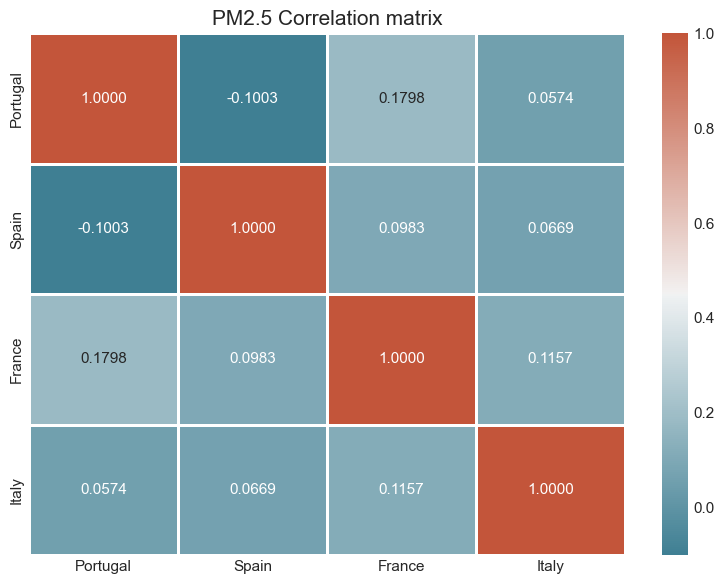

In [32]:
import matplotlib.pyplot as plt

# matplotlib graphs
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 12
plt.rcParams['axes.labelsize'] = 13
plt.rcParams['axes.titlesize'] = 15
plt.rcParams['xtick.labelsize'] = 11
plt.rcParams['ytick.labelsize'] = 11
plt.rcParams['legend.fontsize'] = 11
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.alpha'] = 0.3
plt.rcParams['axes.axisbelow'] = True
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.right'] = False

plt.style.use('seaborn-v0_8-whitegrid')

# Extract PM2.5 data for Portugal, Spain, France, and Italy
countries = ["Portugal", "Spain", "France", "Italy"]
df_countries_pm25 = df_europe[(df_europe["Country"].isin(countries)) & (df_europe["Air_Pollutant"] == "PM2.5")]
correlation_data = {}

for country in countries:
    country_data = df_countries_pm25[df_countries_pm25["Country"] == country]
    if country_data.empty:
        print(f"No PM2.5 data for {country}")
    else:
        correlation_data[country] = country_data["Air_Pollution_Average[ug/m3]"].values

# Create a DataFrame for correlation analysis
valid_countries = [country for country in countries if country in correlation_data and len(correlation_data[country]) > 0]

min_length = min(len(correlation_data[country]) for country in valid_countries)

correlation_df = pd.DataFrame()
for country in valid_countries:
    correlation_df[country] = correlation_data[country][:min_length]

# Calculate correlation matrix
correlation_matrix = correlation_df.corr(method="pearson")
print("PM2.5 Correlation matrix:")
print(correlation_matrix.round(4).to_string())

# Correlation matrix interpretation
print("\nCorrelation matrix interpretation:")
for i in range(len(valid_countries)):
    for j in range(i+1, len(valid_countries)):
        country1 = valid_countries[i]
        country2 = valid_countries[j]
        correlation_value = correlation_matrix.iloc[i, j]
        if abs(correlation_value) >= 0.7:
            correlation_strength = "strong"
        elif abs(correlation_value) >= 0.5:
            correlation_strength = "moderate"
        elif abs(correlation_value) >= 0.3:
            correlation_strength = "weak"
        else:
            correlation_strength = "very weak"
            
        direction = "positive" if correlation_value > 0 else "negative"

        print(f"Correlation between {country1} and {country2}: {correlation_strength} ({direction}) with a value of {correlation_value:.4f}")

# correlation matrix plot
plt.close("all")
plt.figure(figsize=(8, 6))

cmap = sns.diverging_palette(220, 20, as_cmap=True)

# anotated heatmap
sns.heatmap(correlation_matrix, annot=True, cmap=cmap, fmt=".4f", linewidths=0.8, annot_kws={"size":11})

plt.title("PM2.5 Correlation matrix")
plt.tight_layout()
plt.show()